<a href="https://colab.research.google.com/github/Uniholder/Specialization-Yandex-MIPT/blob/main/6_Final_projects/2_churn_prediction/week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir data
!wget -O data/orange_small_churn_data.train https://stepik.org/media/attachments/lesson/90608/_847b6cd041836e8fa914243e83d898fb_orange_small_churn_data.train
!wget -O data/orange_small_churn_labels.train https://stepik.org/media/attachments/lesson/90608/_ce5e9e4280a8856218f1886f007de2a4_orange_small_churn_labels.train

--2022-08-11 12:35:18--  https://stepik.org/media/attachments/lesson/90608/_847b6cd041836e8fa914243e83d898fb_orange_small_churn_data.train
Resolving stepik.org (stepik.org)... 13.69.75.239
Connecting to stepik.org (stepik.org)|13.69.75.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23722578 (23M) [application/octet-stream]
Saving to: ‘data/orange_small_churn_data.train’

data/orange_small_c 100%[===================>]  22.62M  14.7MB/s    in 1.5s    

2022-08-11 12:35:20 (14.7 MB/s) - ‘data/orange_small_churn_data.train’ saved [23722578/23722578]

--2022-08-11 12:35:20--  https://stepik.org/media/attachments/lesson/90608/_ce5e9e4280a8856218f1886f007de2a4_orange_small_churn_labels.train
Resolving stepik.org (stepik.org)... 13.69.75.239
Connecting to stepik.org (stepik.org)|13.69.75.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117024 (114K) [application/octet-stream]
Saving to: ‘data/orange_small_churn_labels.train’

data/ora

In [2]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split

PATH_TO_DATA = 'data'

In [3]:
df = pd.read_csv(os.path.join(PATH_TO_DATA, 'orange_small_churn_data.train'))
labels = pd.read_csv(os.path.join(PATH_TO_DATA, 'orange_small_churn_labels.train'), header=None, squeeze=True)
# df_train.dropna(axis=1, how='all', inplace=True)
df['target'] = labels

In [4]:
df.shape

(40000, 231)

Отделим hold-out dataset

In [5]:
df_train, df_ho = train_test_split(df, test_size=5000, shuffle=True)

In [6]:
df_ho.to_csv(os.path.join(PATH_TO_DATA, 'hold_out_dataset.csv'))

Опишем способы, которыми можно обрабатывать категориальные признаки для подачи на вход модели

- one hot encoder: кодирование признаков в бинарные колонки; плохо подходит для моделей, основанных на деревьях
    - sklearn.preprocessing.OneHotEncoder
    - pandas.get_dummies
- label encoder: замена значений категориальных признаков на целочисленные номера; плохо подходит для линейных моделей, так как задаёт отношения порядка на признаке, то есть добавляет ложную информацию (если реально порядка нет)
    - sklearn.preprocessing.LabelEncoder
    - sklearn.preprocessing.OrdinalEncoder
- frequency encoding: кодируем значения частотой значения признака в колонке
- mean target encoding: значения заменяются средними значениями целевой переменной внутри каждоый категории
- Leave One Out Encoding: аналогично target encoding, но для вычисления среднего не используется текущая строка; приводит к уменьшению переобучения
- хеширование: похоже на ohe, но получается гораздо меньше новых признаков; подходит для признаков с большим количеством уникальных значений

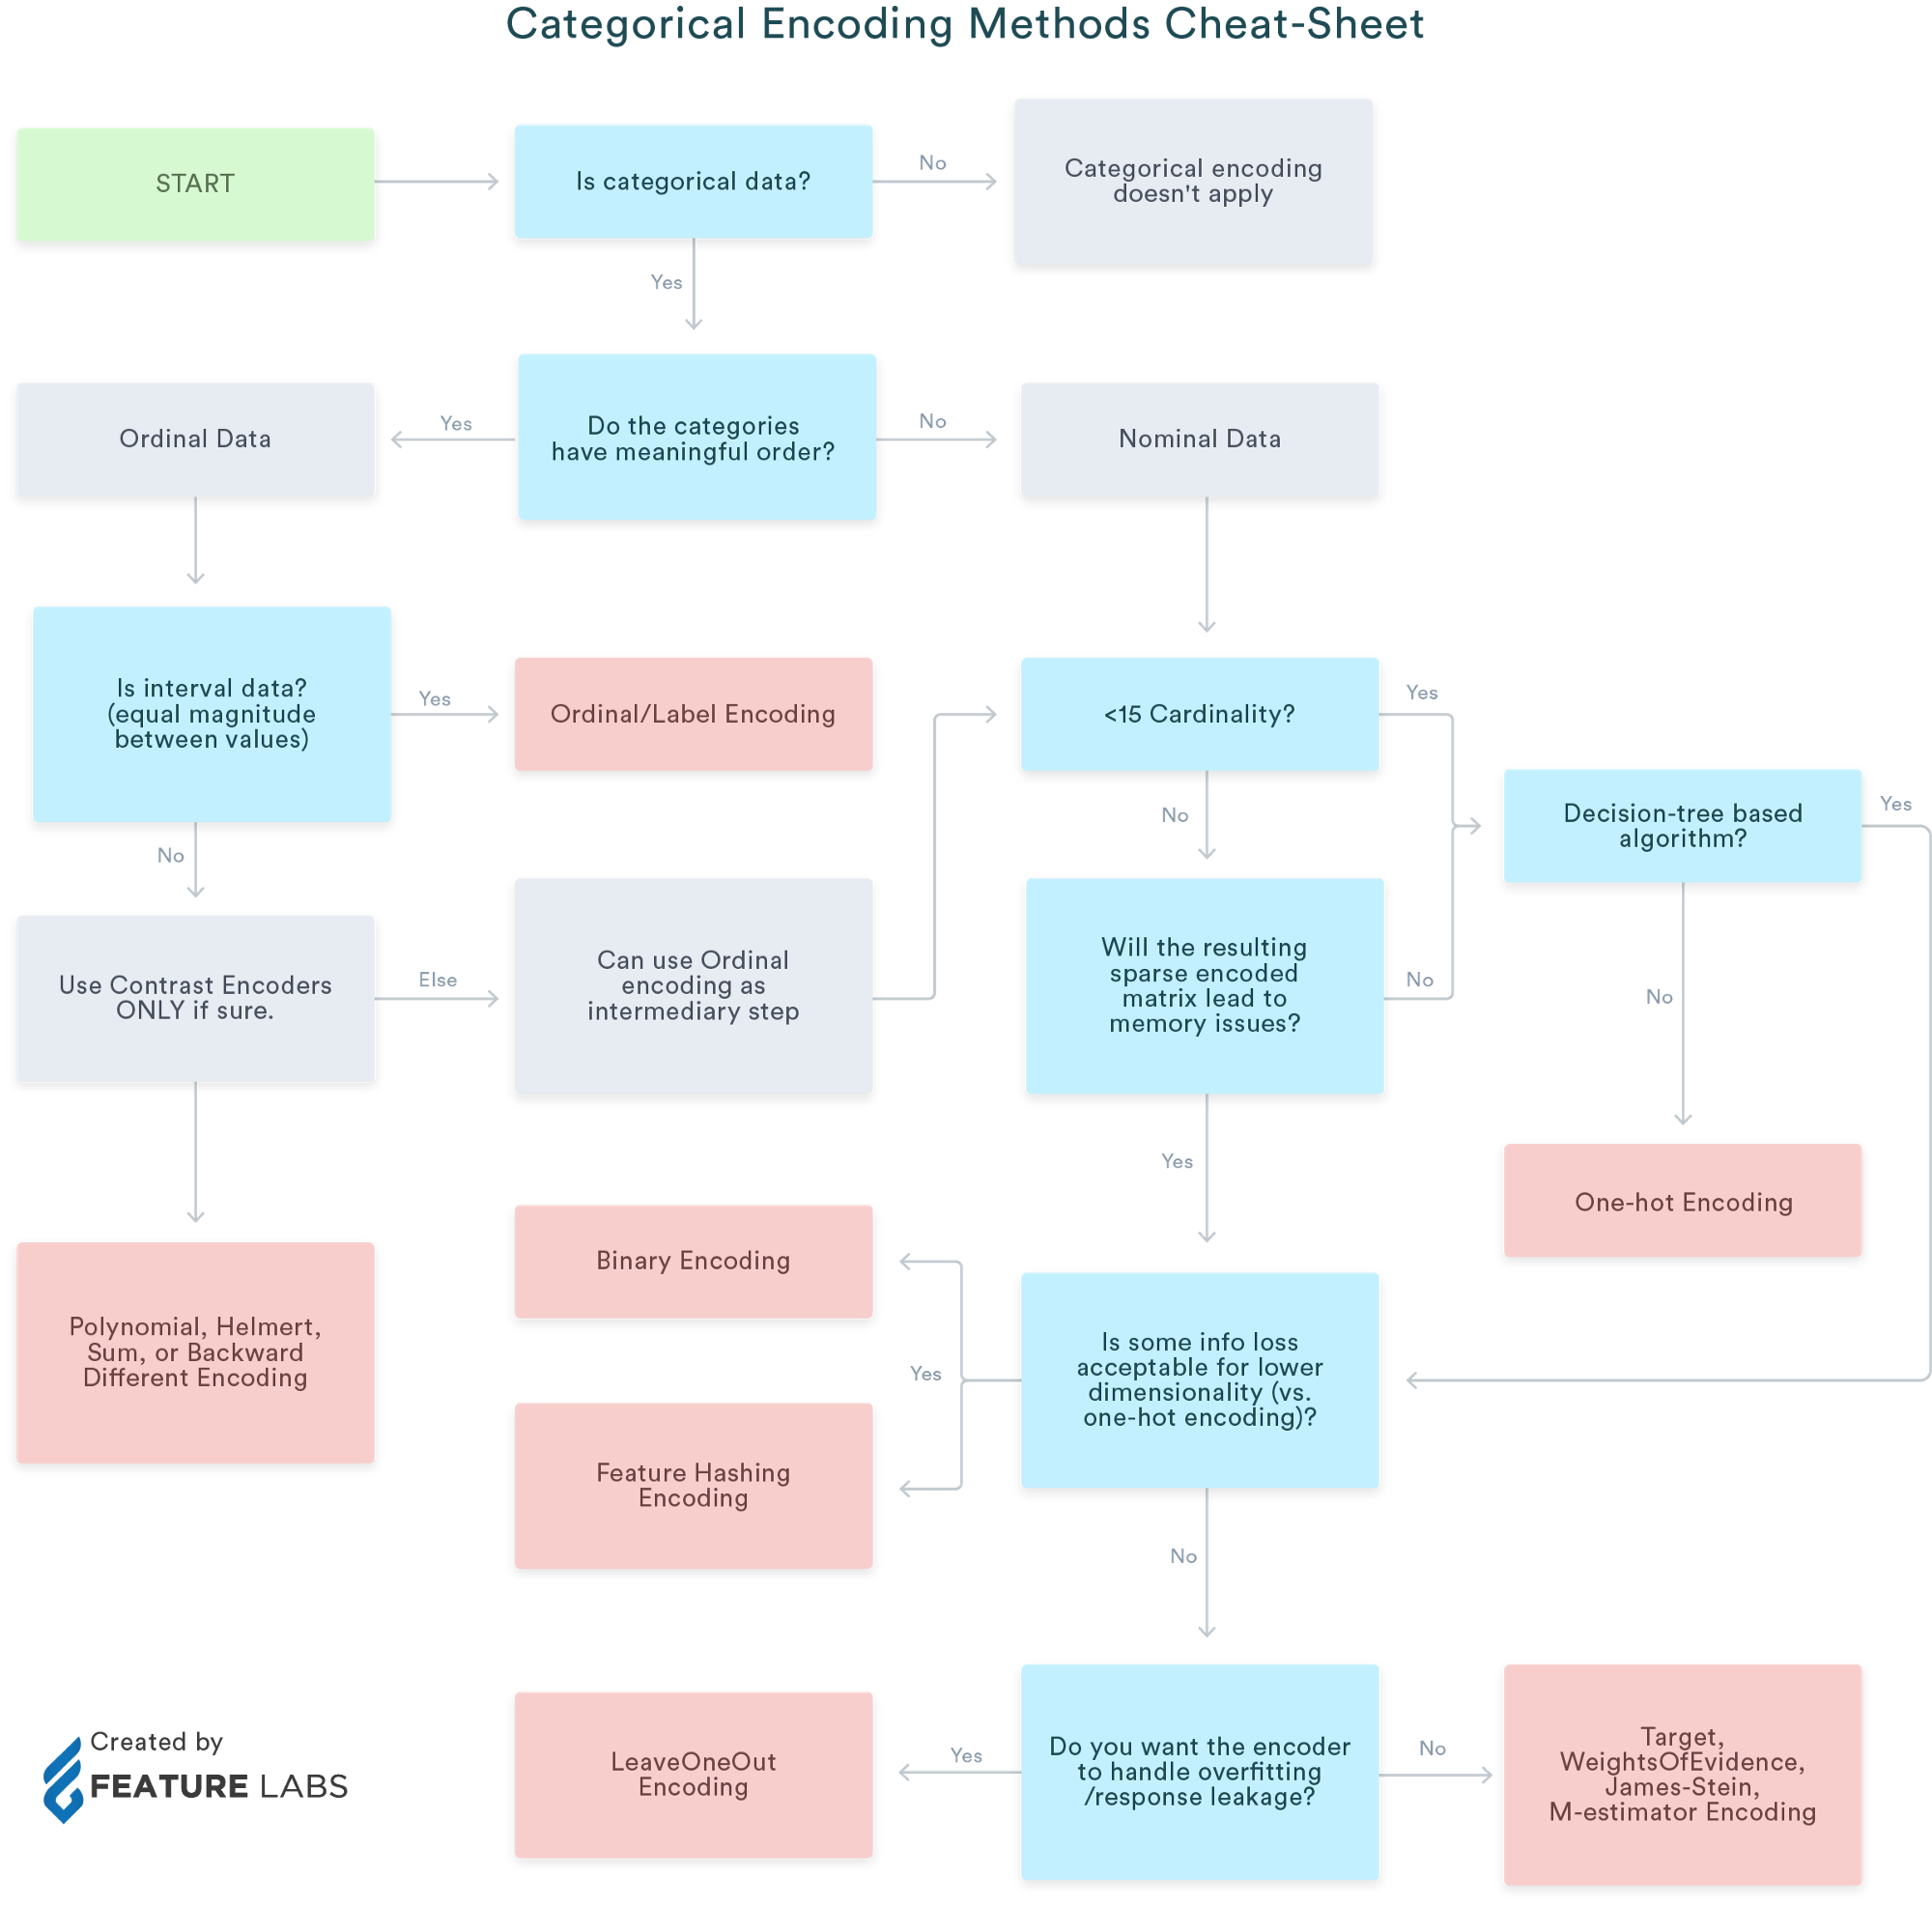

Ключевой метрикой качества выберем ROC AUC.
- наша задача - бинарная классификация
- AUC не зависит от сбалансированности выборки
- метрика не зависит от выбора порога

Вспомогательные метрики:
- precision - чтобы понять ошибки какого рода допускает модель
- recall
- F1
- log loss с весами - чтобы оценить насколько сильно абсолютные значения предсказаний отличаются от истинных

После отделения hold-out датасета остаётся 35000 строк. Возьмём количество фолдов равным 7. Тогда на кросс-валидации выборка делится в отношении 1 / 6.

Стратегия кросс-валидации:
- stratified k-fold: выборка несбалансирована, поэтому применим стратификацию
- shuffle: перемешиваем выборку для равномерного распределения таргета по фолдам